In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score




from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

In [58]:
data_df = pd.read_csv("creditcard.csv")
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Deepchecks : Makine Öğreniminin Doğrulanması ve Test Edilmesi için Yeni Açık Kaynak Paketi

from deepchecks.checks import BoostingOverfit
BoostingOverfit().add_condition_test_score_percent_decline_not_greater_than(threshold=0.05)



BoostingOverfit denetimine koşul ekleme örneği. Bu koşul, bir yükseltme işlemi sırasında test puanı, maksimum değerine kıyasla verilen eşikten daha yüksek bir yüzde oranında düşerse başarısız olmalıdır.

## suite : 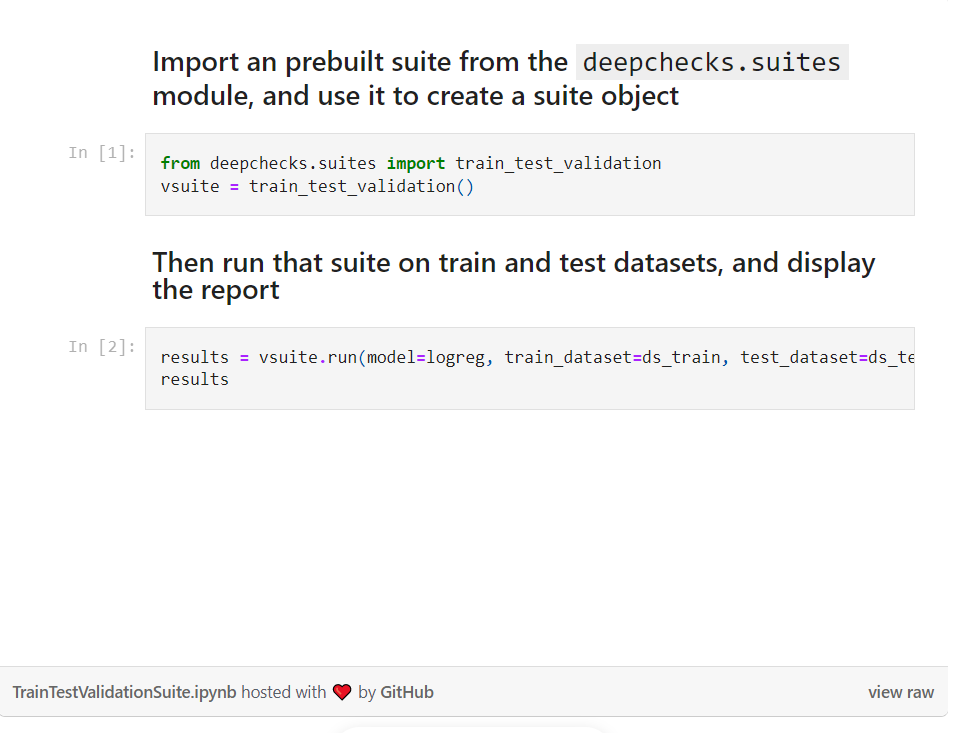

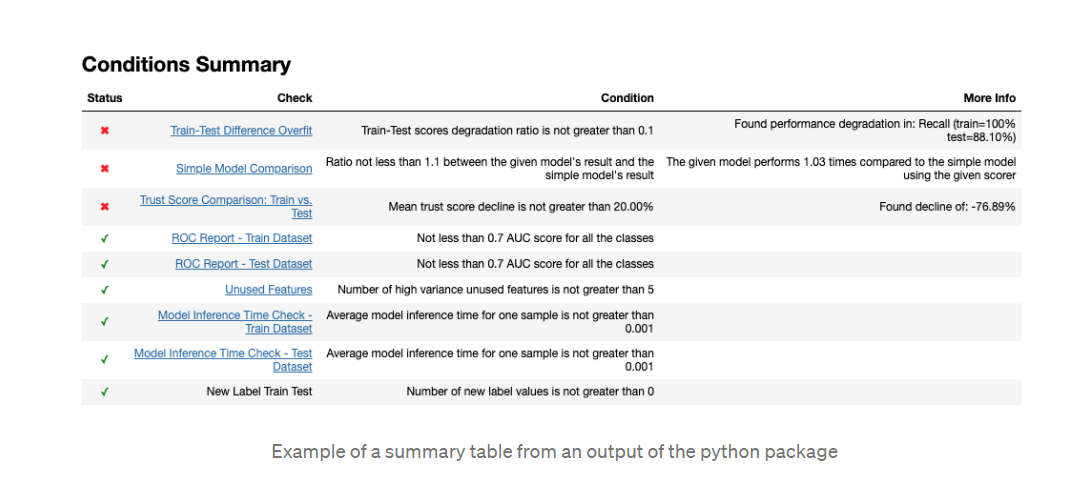

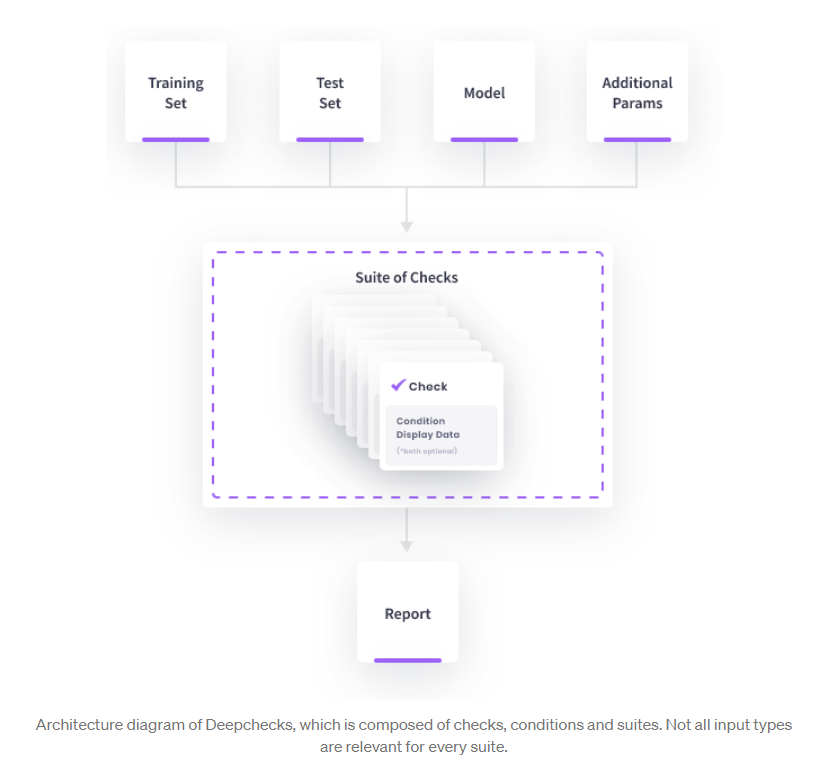

### Merhaba, sorum oldukça dengesiz bir veri setine uyguladığım SMOTE tekniği ile ilgili. SMOTE sadece eğitim setinde uygulandığından, modelim daha iyi performans göstermesine rağmen başarısız bir 'Train Test Prediction Drift' testi çıkıyor. Birisi daha iyi bir yaklaşım biliyor mu? Teşekkürler!


Hey Paula,
SMOTE kullanırken, tren ve test arasındaki tahmin dağılımlarını karşılaştırdığından ve SMOTE trendeki doğal dağılımı manipüle ettiğinden, "Tren Testi Tahmini Kayması" kontrolünün başarısız olması normaldir.
SMOTE'dan önce orijinal veriler üzerinde bu kontrolü çalıştırmak dışında şu anda bir çözüm düşünemiyorum.



Cevap verdiğin için teşekkürler, Matan! Evet, SMOTE'dan önce Train-Test Validation Suite'i çalıştırıyorum. Ancak, Modelin daha iyi bir performans elde etmesi için SMOTE'a ihtiyacım olduğu için onu Değerlendirme Paketine dahil ettim. hatayı anladım yinede teşekkürler



SMOTE'a karşı koymak için prediction drift check'e sınıf ağırlıkları girişi eklemek mümkün olabilir, github deposunda bizim için bir konu açmak ister misiniz? (düzenlendi)https://github.com/deepchecks/deepchecks/issues

## MODEL EVALUTION PAKETİNE SMOTE'U NASIL DAHİL EDEBİLİRİZ ? 

In [11]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


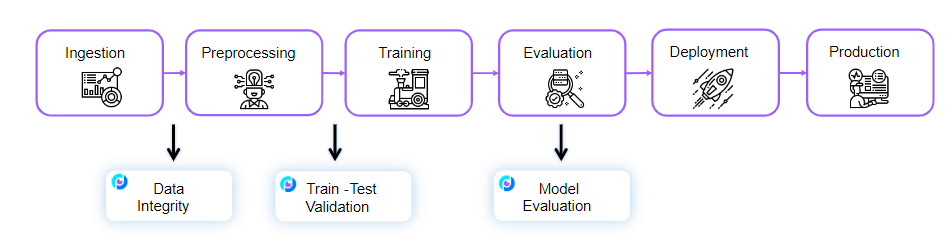

## Dikkat edilmesi gereken tek şey, CV desteğinin ayrıca Pytorch'u da gerektirmesidir, bu da ayrı olarak yüklemeniz gerekir.

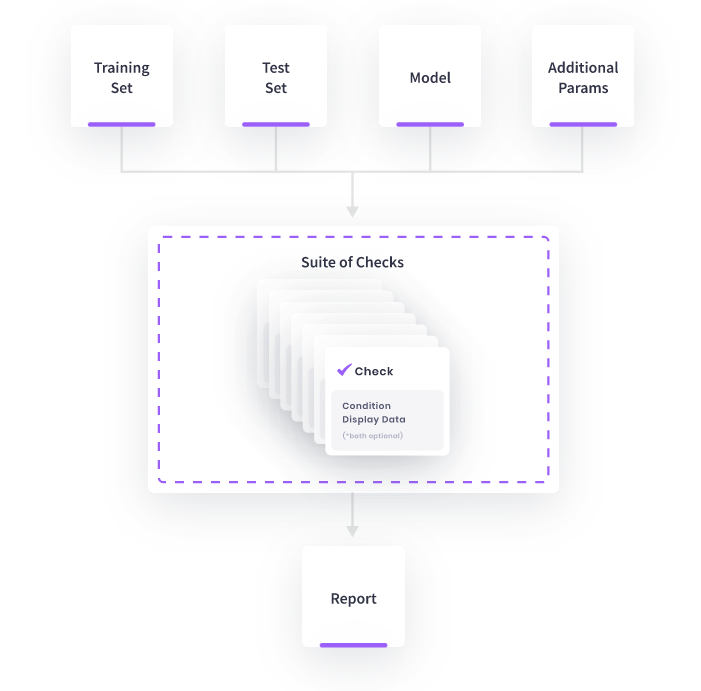

## Deepcheck'leri etkin bir şekilde kullanmak için anlamanız gereken üç farklı paradigma vardır:


                        Checks

                        Conditions

                        Suites 
                        

In [14]:
from deepchecks.tabular.suites import single_dataset_integrity
result = single_dataset_integrity().run(data_df)
result

C:\ProgramData\Anaconda3\lib\site-packages\deepchecks\tabular\suites\default_suites.py:47: DeprecationWarning:

the single_dataset_integrity suite is deprecated, use the data_integrity suite instead

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_6QUKA1WDA5JGZE12M484A3Y4V">Data I…

## bize büyük bir zaman kazandırıyor modelleme sırasında veya sonrasında bunları fark etmemiz zaman kaybına yol açar.

## Data pre-processing and data validation

In [17]:
data_clean_df = data_df.copy()

In [18]:
data_clean_df = data_clean_df.drop_duplicates()

In [57]:
data_clean_df.duplicated().sum()

0

## Artık tüm bu  integrity sorunlarından kurtulduğumuzu görmek için Deepchecks paketini yeniden çalıştırabiliriz.

In [59]:
single_dataset_integrity().run(data_clean_df)

C:\ProgramData\Anaconda3\lib\site-packages\deepchecks\tabular\suites\default_suites.py:47: DeprecationWarning:

the single_dataset_integrity suite is deprecated, use the data_integrity suite instead

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_FRDX93DNQPXVHJIXZI4BG5CCW">Data I…

### Temiz! Model eğitimi için verileri hazırlamaya devam edebiliriz.

## feature engineering yapacağız bu aşamada. gerekiyorsa

## verileri eğitim ve test setlerine ayırmamız gerekiyor

In [60]:
X = data_clean_df.drop(columns='Class', axis=1)
y = data_clean_df['Class']

## biz aslında bunu yapmadan da train_test_validation suite'e datayı doğrudan verebiliriz.

In [61]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

## Normalde bu adımdan hemen sonra, bazı modellerle denemeler yapmaya çalışırız ve bizi kim suçlayabilir!

## Ancak Deepchecks, veri kümesinin bölünme şekliyle ilgili sorunları tespit etmek için tasarlanmış, built-in özel bir check suite'i sunar

# Deepchecks'in daha gelişmiş işlevlerine erişmek için, ona veri kümemiz hakkında biraz daha bilgi vermeliyiz.****

## What is the label?  (etiket nedir)
## Kategorik özellikler nelerdir?

### Bunu yapmak için DataFrame'lerimizi saran ve bu metadata bilgilerini de içeren Deepchecks Dataset nesnesini kullanıyoruz.

In [62]:
from deepchecks.tabular import Dataset


cat_cols = []

# cat_cols = ['Month',
#  'WeekOfMonth',
#  'DayOfWeek',
#  'Make',
#  'AccidentArea',
#  'DayOfWeekClaimed',
#  'MonthClaimed',
#  'WeekOfMonthClaimed',
#  'Sex',
#  'MaritalStatus',
#  'Fault',
#  'PolicyType',
#  'VehicleCategory',
#  'PoliceReportFiled',
#  'WitnessPresent',
#  'AgentType',
#  'NumberOfSuppliments',
#  'BasePolicy']

## Ayrıca Deepchecks'e tarih saat göstergemizin ne olduğunu söylememiz gerekiyor:



### Deepchecks daha sonra bölünmenin zaman sızıntısı içerdiği durumlarda uyarı verebilir, ancak bu durumda test verilerinin eğitim verilerinden sonra gelmesi için doğru şekilde ayrıldığımızı biliyoruz.

In [63]:
train_ds = Dataset(X_train, label=y_train, cat_features=cat_cols)
test_ds = Dataset(X_test, label=y_test, cat_features=cat_cols)

## Şimdi tam olarak bölünmemizi doğrulamak için oluşturulmuş train_test_validation suite'ini çalıştırıyoruz.


## Bu, daha karmaşık bir mantığın çalıştırılması nedeniyle  integrity checks biraz daha uzun sürebilir.

###### Raporun özeti şöyle görünüyor: 

In [64]:
from deepchecks.tabular.suites import train_test_validation

res = train_test_validation().run(train_ds, test_ds)
res

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_32OLBHHSW706RRU5XNJ2LDNSL">Train …

## buradaki sorunları hallettikten sonra bu uygulamayı tekrar çalıştırıp sonuçlara bakacağız.

In [42]:
data_clean_df.drop(columns=["V17","V12"],inplace=True)

In [43]:
X = data_clean_df.drop(columns='Class', axis=1)
y = data_clean_df['Class']

In [44]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [45]:
from deepchecks.tabular import Dataset


cat_cols = []

# cat_cols = ['Month',
#  'WeekOfMonth',
#  'DayOfWeek',
#  'Make',
#  'AccidentArea',
#  'DayOfWeekClaimed',
#  'MonthClaimed',
#  'WeekOfMonthClaimed',
#  'Sex',
#  'MaritalStatus',
#  'Fault',
#  'PolicyType',
#  'VehicleCategory',
#  'PoliceReportFiled',
#  'WitnessPresent',
#  'AgentType',
#  'NumberOfSuppliments',
#  'BasePolicy']

In [46]:
train_ds = Dataset(X_train, label=y_train, cat_features=cat_cols)
test_ds = Dataset(X_test, label=y_test, cat_features=cat_cols)

In [48]:
from deepchecks.tabular.suites import train_test_validation

res = train_test_validation().run(train_ds, test_ds)
res

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_RRA3QJZH43AJHA87KWLAO4GKR">Train …

## her şey clear ise modeli eğitmeye geçebiliriz.

### Model training and validation

In [51]:
rfc = RandomForestClassifier(max_depth=6,random_state=42)

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

## BENCE BURADA BİZ GRİD-SEARCHLERİMİZİ VS YAPALIM KENDİMİZCE EN SONKİ HYPERPARAMETRELER İLE DEEPCHECKS YAPALIM. AMA BU ZORUNLULUK DEĞİL TABİKİ

## Artık eğitimli bir modelimiz olduğuna göre, Deepcheck'lerin model değerlendirmesine nasıl yardımcı olabileceğine bakalım ya da her şeyden sonra deepchecks'e gidebiliriz örneğin ;

                                        vanilla ile deepcheks 
                                        unbalanced ile deepchecks
                                        grid-search ile deepchecks gibi.

In [65]:
from deepchecks.tabular.suites import model_evaluation

In [67]:
res = model_evaluation().run(train_ds, test_ds, rfc)
res

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_JRTP9E81WW8RUQI5QN4AXBV2N">Model …

## modelimizde birtakım sorunlar var 

## Örneğin, her zaman 0 sınıfı çıktı veren sabit bir modelle kıyaslamısına değinmek elzemdir,simple model çünkü elimizdeki data  ; unbalanced

## Dengesiz sınıfları ele almak için modeli yeniden eğitelim : ve sonuçlara tekrar bakmamız gerekir.

In [68]:
rfc2 = RandomForestClassifier(max_depth=6,random_state=42,class_weight="balanced")

In [69]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [70]:
res = model_evaluation().run(train_ds, test_ds, rfc2)
res

Accordion(children=(VBox(children=(HTML(value='\n            <h1 id="summary_Y30ATWA42NPZ55LUPWNYVX7OY">Model …

## overfit ile ilgili bize aslında bilgi vermiyor bunu suite eklememiz gerekecek.

## Başta Deepchecks'in özelleştirilmiş suite'leri de desteklediğinden bahsetmiştik - birbiri ardına çalışacak ve sonuçları birlikte görüntülenecek bir check listesi.


# Aşağıdakileri gerçekleştiren özel bir süite tanımlamak için bu işlevi kullanalım:




test performansının trene kıyasla %0,1'den fazla bozulmadığını doğrulayan bir kontrol gerçekleştirir
model için bir confusion matrix oluşturur ve bunu rapora dahil eder
Gradyan destekli modelde çok fazla yineleme kullanılmasının neden olduğu fazla overfit'i kontrol eder

### Özel paketi kurma ve çalıştırma kodu oldukça açıklayıcıdır.

In [71]:
from deepchecks.tabular import Suite
from deepchecks.tabular.checks import PerformanceReport, BoostingOverfit, SimpleModelComparison, ConfusionMatrixReport

In [73]:
custom_suite = Suite('My Custom Performance Suite',
                     PerformanceReport().add_condition_train_test_relative_degradation_not_greater_than(0.1),
                     ConfusionMatrixReport(),
                     BoostingOverfit(alternative_scorer=['recall', 'recall']).add_condition_test_score_percent_decline_not_greater_than(0.01),
                     
                    )

custom_suite.run(train_ds, test_ds, rfc2)

AttributeError: 'BoostingOverfit' object has no attribute 'add_condition_test_score_percent_decline_not_greater_than'

## bu çalışmadı ama bu customize olayına odaklanılabilir.

## Burada Deepcheck'leri şu amaçlarla kullandık: 

                aşina olmayan yeni bir veri kümesini değerlendirmek
                tren/test setlerinin veri sızıntısı olmadan doğru şekilde ayrıldığından emin olun
                modelimizin performansını inceleyin

## modelde veya datada bir sıkıntı ollabilir ve biz bunu yakalayamaybiliriz deepchecks bunu engelliyor.

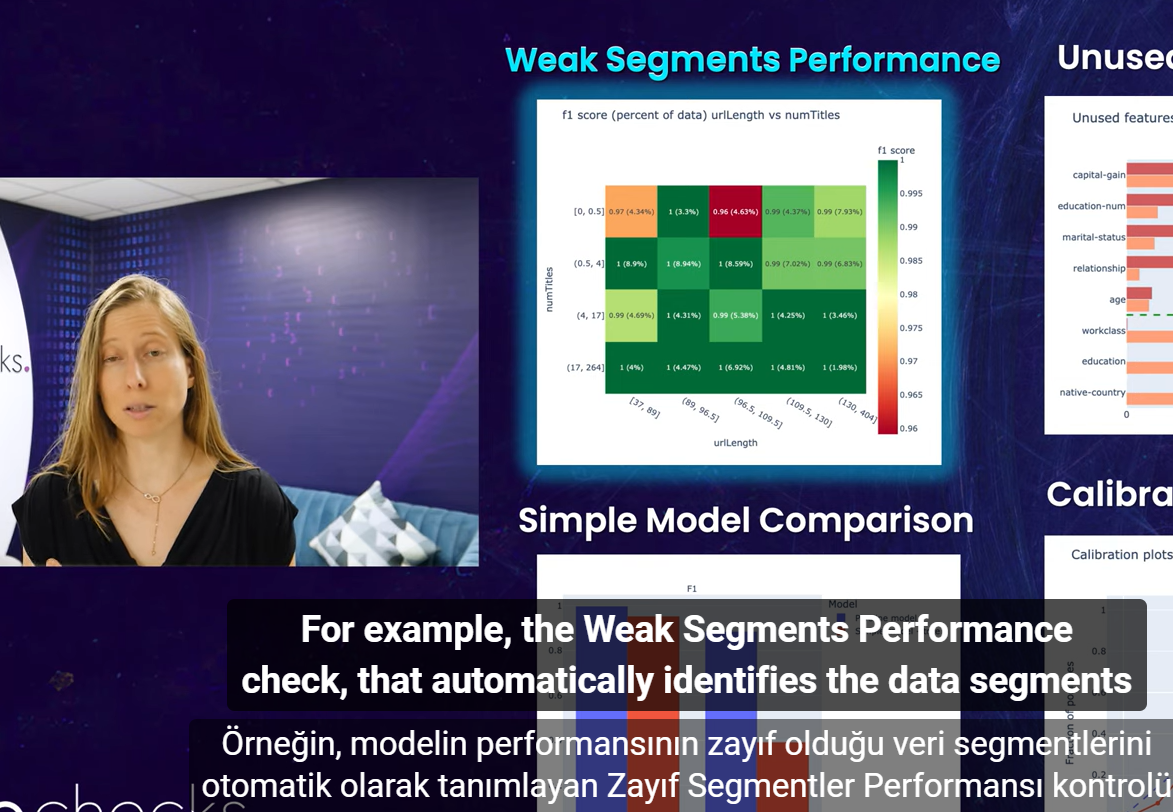

## biz deepchecks kullanmayınca da skorlar buluyoruz ama acaba bir sorun var mı ? bilmiyoruz.

## deepchecks ile ml sistemimizin kontrolünü elimizde tutmuş oluyoruz sessiz arızaları anında görebiliyoruz.(continuous validation)